In [ ]:
# Descrição: Esse programa classifica se uma pessoa tem uma doença cardiovascular ou não.


In [ ]:
# Importar as bibliotecas que vamos utilizar
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Carregar os dados fonte
from google.colab import files
uploaded = files.upload()

Saving processed.data.cleveland.hungarian.csv to processed.data.cleveland.hungarian.csv


In [ ]:
# Armazenar os dados em variáveis
df = pd.read_csv('processed.cleveland.pdata.csv')

# Mostrar os dados
df.head(303)

,idade,sexo,tipo_dorp,p_sang_estavel,colest_mgpdl,fbs_mq_umdoiszeromd/dl,electrocg,max rit_cardiaco,ex_in_angina,oldpeak,curva,ca,thal,num_diag
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [ ]:
# Pegar o tamanho dos dados
df.shape

(303, 14)

In [ ]:
# Contar os valores vazios em cada coluna
df.isna().sum()

idade                     0
sexo                      0
tipo_dorp                 0
p_sang_estavel            0
colest_mgpdl              0
fbs_mq_umdoiszeromd/dl    0
electrocg                 0
max rit_cardiaco          0
ex_in_angina              0
oldpeak                   0
curva                     0
ca                        0
thal                      0
num_diag                  0
dtype: int64

In [ ]:
# Outro meio de checar se há algum valor vazio na base de dados
df.isnull().values.any()

False

In [ ]:
# Ver estatísticas básicas
df.describe()

,idade,sexo,tipo_dorp,p_sang_estavel,colest_mgpdl,fbs_mq_umdoiszeromd/dl,electrocg,max rit_cardiaco,ex_in_angina,oldpeak,curva,num_diag
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
# Fazer uma contagem com o número de pacientes ou indivíduos com doença(s) cardiovascular(s)
df['num_diag'].value_counts()

0    164
1    139
Name: num_diag, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


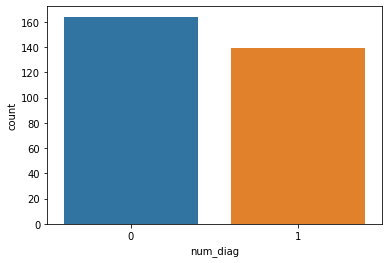

In [ ]:
# Visualizar a contagem
sns.countplot(df['num_diag'])

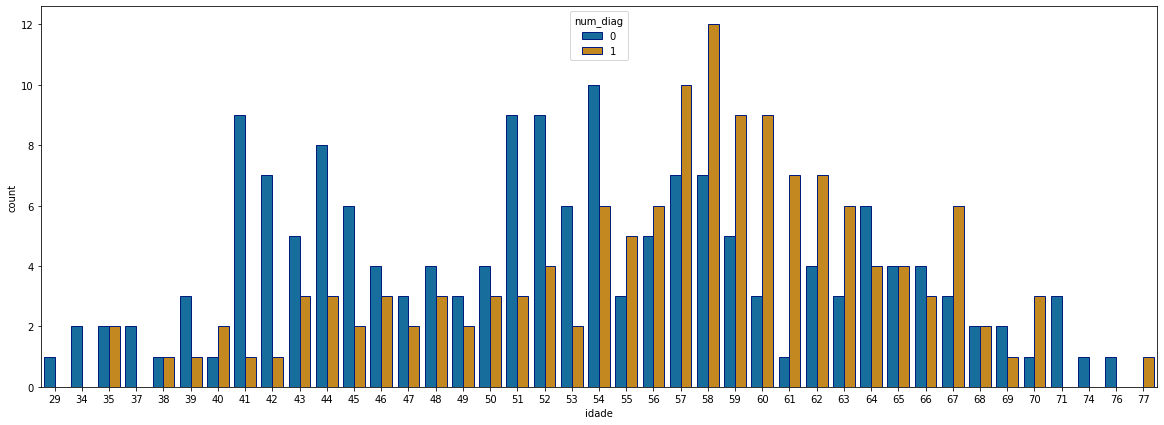

In [ ]:
# Exibir, em gráfico, o número de pessoas de cada idade que possui (em vermelho) e que não possui (em azul) alguma doença cardiovascular.
import matplotlib.pyplot as plt

# Visualizar a coluna IDADE
plt.figure(figsize = (20,7))
sns.countplot(x = 'idade', hue = 'num_diag', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors=1))

In [ ]:
# Obter a correlação das colunas
df.corr()

,idade,sexo,tipo_dorp,p_sang_estavel,colest_mgpdl,fbs_mq_umdoiszeromd/dl,electrocg,max rit_cardiaco,ex_in_angina,oldpeak,curva,num_diag
idade,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.223120
sexo,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.276816
tipo_dorp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.414446
p_sang_estavel,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.150825
colest_mgpdl,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.085164
fbs_mq_umdoiszeromd/dl,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.025264
electrocg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.169202
max rit_cardiaco,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.417167
ex_in_angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.424510


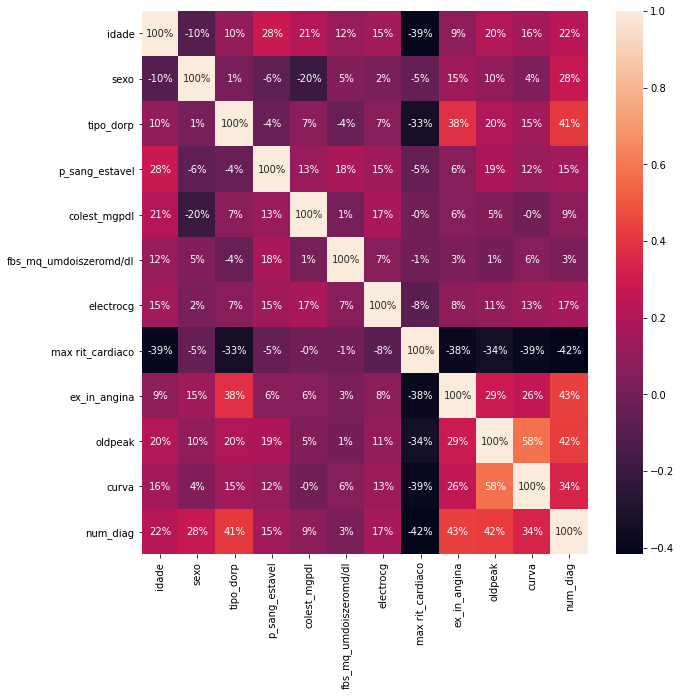

In [ ]:
# Visualizar os dados
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
# Dividir os dados entre dados de recursos e dados alvo
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
# Dividir os dados novamente, 75% em dados de treinamento e 25% em dados de teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=1)

### Identificar e emover as linhas de dados que contenham erros na tradução dos valores ('?') ###

# Obter a quantidade de linhas com '?' em X_train e classificá-las como inválidas '-1' em Y_train
index_of_xtr = np.where(X_train == '?')
size_xtr = 1

for dim in np.shape(index_of_xtr):
  size_xtr *= dim

for i in range(int(size_xtr / 2)):
  value_index_xtr = index_of_xtr[0][i]
  Y_train[value_index_xtr] = -1

# Obter a quantidade de linhas com '?' em X_test e classificá-las como inválidas '-1' em Y_test
index_of_xts = np.where(X_test == '?')
size_xts = 1

for dop in np.shape(index_of_xts):
  size_xts *= dop

for j in range(int(size_xts / 2)):
  value_index_xts = index_of_xts[0][j]
  Y_test[value_index_xts] = -1

# Remover as linhas que contem '?' em X_train e X_test
X_train = X_train[(X_train.astype(str) != '?').all(axis=1)]
X_test = X_test[(X_test.astype(str) != '?').all(axis=1)]

# Remover as linhas inválidas em Y_train e Y_test
Y_train = Y_train[(Y_train.astype(int) != -1)]
Y_test = Y_test[(Y_test.astype(int) != -1)]

#np. set_printoptions(threshold=np. inf)

In [ ]:
# Feature scaling (escalar os valores nos dados para valores entre 0 e 1 inclusivo)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Usar Random Forest Classifier da biblioteca sklearn
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Testar a precisão do modelo nos dados de treinamento
model = forest
model.score(X_train, Y_train)

0.9910313901345291

In [ ]:
# Testar a precisão do modelo nos dados de teste
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test))
true_negative = cm[0][0]
true_positive = cm[1][1]
false_negative = cm[1][0]
false_positive = cm[0][1]

# Printar os valores do confusion_matrix
print(cm)

# Printar a precisão nos dados de teste
print('Precisão nos dados de teste: {}'.format((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)))

[[34  5]
 [11 24]]
Precisão nos dados de teste: 0.7837837837837838
